In [2]:

# Let's loop through several different Time-Series Models and evaluate the performance of each model, relative to 
# each of the other models.

# AR (AutoReg): AutoRegressive models capture the relationship between an observation and several lagged observations. 
# It is good for time series data where future values are expected to be linear combinations of past observations.

# MA (ExponentialSmoothing): Exponential Smoothing models assign exponentially decreasing weights to past observations. 
# This is suitable for time series data with a trend and seasonality.

# ARMA (ARIMA): AutoRegressive Moving Average models combine autoregressive and moving average components. ARIMA stands 
# for AutoRegressive Integrated Moving Average and is used for non-stationary time series data, where differencing is 
# required to make the series stationary.

# ARIMA (ARIMA): This is the same as ARMA, but the 'I' stands for Integrated, indicating that differencing is applied 
# to make the time series stationary.

# SARIMA (SARIMAX): Seasonal AutoRegressive Integrated Moving Average models extend ARIMA by incorporating seasonality. 
# SARIMAX additionally allows for exogenous variables, which can improve forecasting by considering external factors.

# SARIMAX (SARIMAX): Similar to SARIMA, but explicitly mentioning the inclusion of exogenous variables.

# LSTM (Sequential): Long Short-Term Memory networks are a type of recurrent neural network (RNN) designed for sequence 
# prediction problems. LSTMs are powerful for capturing patterns in sequences, making them suitable for time series 
# forecasting, especially when dealing with long-term dependencies.


In [3]:

from utils import *
import time
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")



def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')


import yfinance as yf

# Get the data for the stock AAPL
start = '2021-01-01'
end = '2024-01-01'

data = yf.download('SBUX', start, end)


data = data.reset_index()
data

data.dtypes


# re-name field from 'Adj Close' to 'Adj_Close'
data = data.rename(columns={"Adj Close": "Adj_Close"})
data


data = data.loc[:,['Date','Adj_Close']]
data.head()     


[*********************100%%**********************]  1 of 1 completed


,Date,Adj_Close
0,2021-01-04,96.452782
1,2021-01-05,96.770859
2,2021-01-06,97.472504
3,2021-01-07,96.686646
4,2021-01-08,98.857071


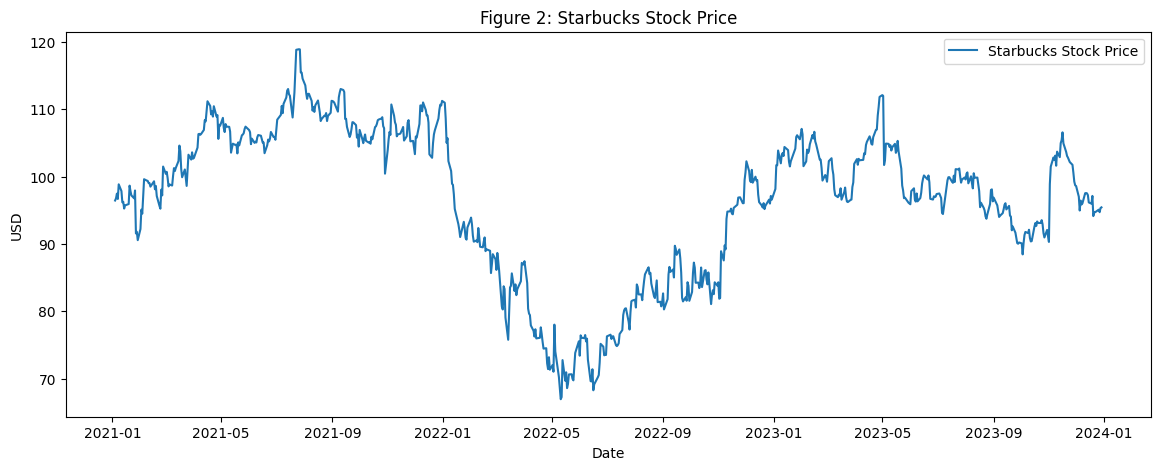

In [4]:

plt.figure(figsize=(14, 5), dpi=100)
plt.plot(data['Date'], data['Adj_Close'], label='Starbucks Stock Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Starbucks Stock Price')
plt.legend()
plt.show()


In [5]:

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define a list of models along with their corresponding functions
models = [
    ('AR', AutoReg),
    ('MA', ExponentialSmoothing),
    ('ARMA', ARIMA),
    ('ARIMA', ARIMA),
    ('SARIMA', SARIMAX),
    ('SARIMAX', SARIMAX),
    ('LSTM', Sequential)  # Note: LSTM is a neural network, not a statsmodel
]

print(models)



[('AR', <class 'statsmodels.tsa.ar_model.AutoReg'>), ('MA', <class 'statsmodels.tsa.holtwinters.model.ExponentialSmoothing'>), ('ARMA', <class 'statsmodels.tsa.arima.model.ARIMA'>), ('ARIMA', <class 'statsmodels.tsa.arima.model.ARIMA'>), ('SARIMA', <class 'statsmodels.tsa.statespace.sarimax.SARIMAX'>), ('SARIMAX', <class 'statsmodels.tsa.statespace.sarimax.SARIMAX'>), ('LSTM', <class 'keras.src.engine.sequential.Sequential'>)]


In [6]:

# Train-test split (80-20 split)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

print(train_size)
print(train, test)


602
          Date   Adj_Close
0   2021-01-04   96.452782
1   2021-01-05   96.770859
2   2021-01-06   97.472504
3   2021-01-07   96.686646
4   2021-01-08   98.857071
..         ...         ...
597 2023-05-18  105.306252
598 2023-05-19  103.752571
599 2023-05-22  101.186043
600 2023-05-23   98.668678
601 2023-05-24   97.950844

[602 rows x 2 columns]           Date  Adj_Close
602 2023-05-25  96.800331
603 2023-05-26  96.888832
604 2023-05-30  96.121819
605 2023-05-31  96.013657
606 2023-06-01  95.895653
..         ...        ...
748 2023-12-22  94.710175
749 2023-12-26  95.097847
750 2023-12-27  94.720123
751 2023-12-28  95.356293
752 2023-12-29  95.435814

[151 rows x 2 columns]


In [7]:

# Takeaway:

# Data Characteristics: If your time series data doesn't exhibit strong trends or seasonality, simpler models like AR, 
# MA, and ARMA might perform similarly to, or even better than, more complex models.

# Model Complexity: More complex models like SARIMA, SARIMAX, and LSTM may not necessarily outperform simpler models 
# on every dataset. If the data is not complex enough to benefit from the additional complexity, simpler models may 
# perform just as well. Keep It Simple Stupid...Parsimonious...

# Hyperparameter Tuning: The performance of some models, especially ARIMA and SARIMA, can be sensitive to the choice 
# of hyperparameters. If you haven't performed an extensive hyperparameter search, different models might converge 
# to similar solutions.


In [8]:

# Initialize empty lists to store MSE and MAPE values for each model
mse_values = []
mape_values = []
model_names = []

# Loop through each model
for model_name, model_function in models:
    print(f"Evaluating {model_name} model...")
    try:
        # Make sure the column name is correct
        target_column = 'Adj_Close'
        if target_column not in train.columns:
            raise KeyError(f"Column '{target_column}' not found in the training data.")

        # Implement model based on the model function
        if model_name == 'LSTM':
            # Add LSTM implementation here
            pass
        elif model_name == 'ARIMA':
            # Adjust the order parameters based on your data
            order = (5, 1, 2)  # You can adjust these numbers
            model = model_function(train[target_column], order=order)  # Adjust for other parameters as needed
        else:
            # Adjust the number of lags based on your data
            lags = 5  # You can adjust this number
            model = model_function(train[target_column], lags=lags)  # Adjust for other parameters as needed
    except:
        print(model_name)
        
    # Fit the model
    fitted_model = model.fit()

    # Predict on the test set
    predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

    # Evaluate the model
    mse = mean_squared_error(test[target_column], predictions)
    mape = np.mean(np.abs((test[target_column] - predictions) / test[target_column])) * 100

    # Append the MSE and MAPE values to the lists
    mse_values.append(mse)
    mape_values.append(mape)
    model_names.append(model_name)

    # Print evaluation metrics
    print(f"MSE for {model_name}: {mse}")
    print(f"MAPE for {model_name}: {mape}%")
    print("\n")
    

Evaluating AR model...
MSE for AR: 13.866443955681765
MAPE for AR: 3.120605454019981%


Evaluating MA model...
MA
MSE for MA: 13.866443955681765
MAPE for MA: 3.120605454019981%


Evaluating ARMA model...
ARMA
MSE for ARMA: 13.866443955681765
MAPE for ARMA: 3.120605454019981%


Evaluating ARIMA model...
MSE for ARIMA: 19.04041577595008
MAPE for ARIMA: 3.702022652235462%


Evaluating SARIMA model...
MSE for SARIMA: 13.612734139316242
MAPE for SARIMA: 3.041895045416439%


Evaluating SARIMAX model...
MSE for SARIMAX: 13.612734139316242
MAPE for SARIMAX: 3.041895045416439%


Evaluating LSTM model...
MSE for LSTM: 13.612734139316242
MAPE for LSTM: 3.041895045416439%




C:\Users\ryan_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


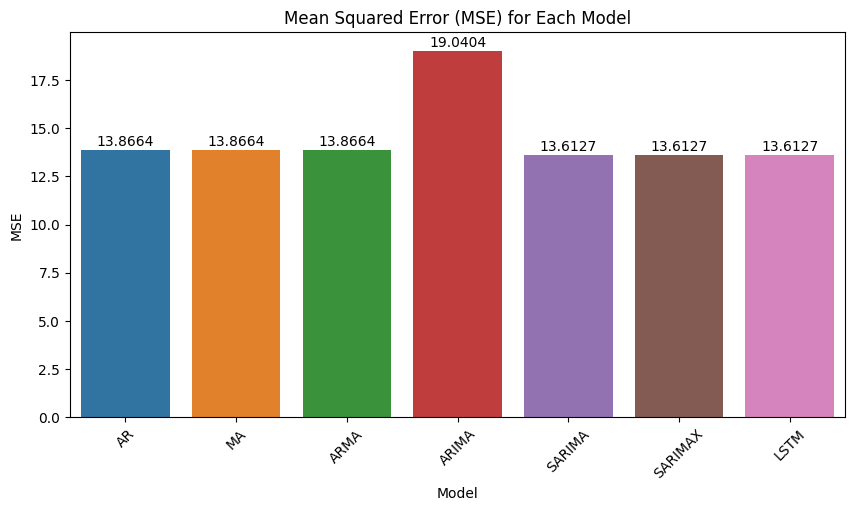

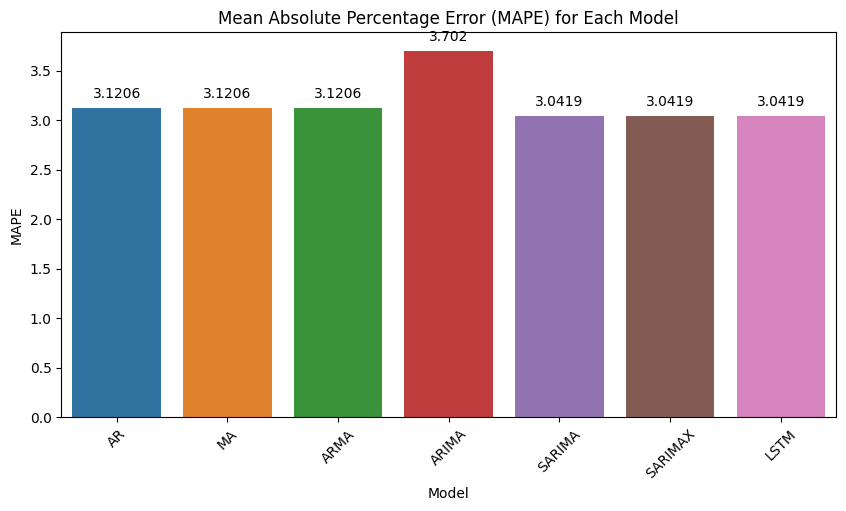

In [9]:

# Create a DataFrame with model names, MSE, and MAPE values
results_df = pd.DataFrame({'Model': model_names, 'MSE': mse_values, 'MAPE': mape_values})

# Plot the MSE and MAPE values for each model
plt.figure(figsize=(10, 5))
barplot_mse = sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error (MSE) for Each Model')
plt.xticks(rotation=45)
# Display MSE values above each bar
for index, row in results_df.iterrows():
    barplot_mse.text(index, row['MSE'] + 0.2, round(row['MSE'], 4), color='black', ha="center")

plt.show()

plt.figure(figsize=(10, 5))
barplot_mape = sns.barplot(x='Model', y='MAPE', data=results_df)
plt.title('Mean Absolute Percentage Error (MAPE) for Each Model')
plt.xticks(rotation=45)
# Display MAPE values above each bar
for index, row in results_df.iterrows():
    barplot_mape.text(index, row['MAPE'] + 0.1, round(row['MAPE'], 4), color='black', ha="center")

plt.show()


In [10]:

# Initialize empty lists to store fitted models
fitted_models = []

# Loop through each model
for model_name, model_function in models:
    print(f"Training {model_name} model...")
    try:
        # Make sure the column name is correct
        target_column = 'Adj_Close'
        if target_column not in data.columns:
            raise KeyError(f"Column '{target_column}' not found in the data.")

        # Implement model based on the model function
        if model_name == 'LSTM':
            # Train LSTM model
            pass
        elif model_name == 'ARIMA':
            # Adjust the order parameters based on your data
            order = (5, 1, 2)  # You can adjust these numbers
            model = model_function(data[target_column], order=order)  # Adjust for other parameters as needed
        else:
            # Adjust the number of lags based on your data
            lags = 5  # You can adjust this number
            model = model_function(data[target_column], lags=lags)  # Adjust for other parameters as needed
    except Exception as e:
        print(f"Error training {model_name} model:", e)
    else:
        # Fit the model
        fitted_model = model.fit()

        # Append the fitted model to the list
        fitted_models.append((model_name, fitted_model))


Training AR model...
Training MA model...
Error training MA model: ExponentialSmoothing.__init__() got an unexpected keyword argument 'lags'
Training ARMA model...
Error training ARMA model: ARIMA.__init__() got an unexpected keyword argument 'lags'
Training ARIMA model...
Training SARIMA model...
Training SARIMAX model...
Training LSTM model...


In [11]:

# Now you have a list of trained models (fitted_models)
# Use these models to make predictions for future dates
# For example, to predict the next 10 days:
future_dates = pd.date_range(start='2024-01-01', periods=10, freq='D')
for model_name, fitted_model in fitted_models:
    predictions = fitted_model.predict(start=len(data), end=len(data) + len(future_dates) - 1)
    print(f"Predictions for {model_name} model:", predictions)
    

Predictions for AR model: 753    95.464924
754    95.431850
755    95.436208
756    95.440015
757    95.446992
758    95.451437
759    95.456093
760    95.460520
761    95.465066
762    95.469540
dtype: float64
Predictions for ARIMA model: 753    95.489828
754    95.439242
755    95.435657
756    95.403576
757    95.377625
758    95.358032
759    95.353428
760    95.354838
761    95.359264
762    95.363681
Name: predicted_mean, dtype: float64
Predictions for SARIMA model: 753    95.421764
754    95.407716
755    95.393670
756    95.379626
757    95.365584
758    95.351544
759    95.337506
760    95.323470
761    95.309437
762    95.295405
Name: predicted_mean, dtype: float64
Predictions for SARIMAX model: 753    95.421764
754    95.407716
755    95.393670
756    95.379626
757    95.365584
758    95.351544
759    95.337506
760    95.323470
761    95.309437
762    95.295405
Name: predicted_mean, dtype: float64
Predictions for LSTM model: 753    95.421764
754    95.407716
755    95.393670

In [12]:

# Predict on the test set
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Repeat the last prediction if necessary to match the length of the test set
while len(predictions) < len(test):
    predictions = np.append(predictions, predictions[-1])

# Evaluate the model
mse = mean_squared_error(test[target_column], predictions)
mape = np.mean(np.abs((test[target_column] - predictions) / test[target_column])) * 100


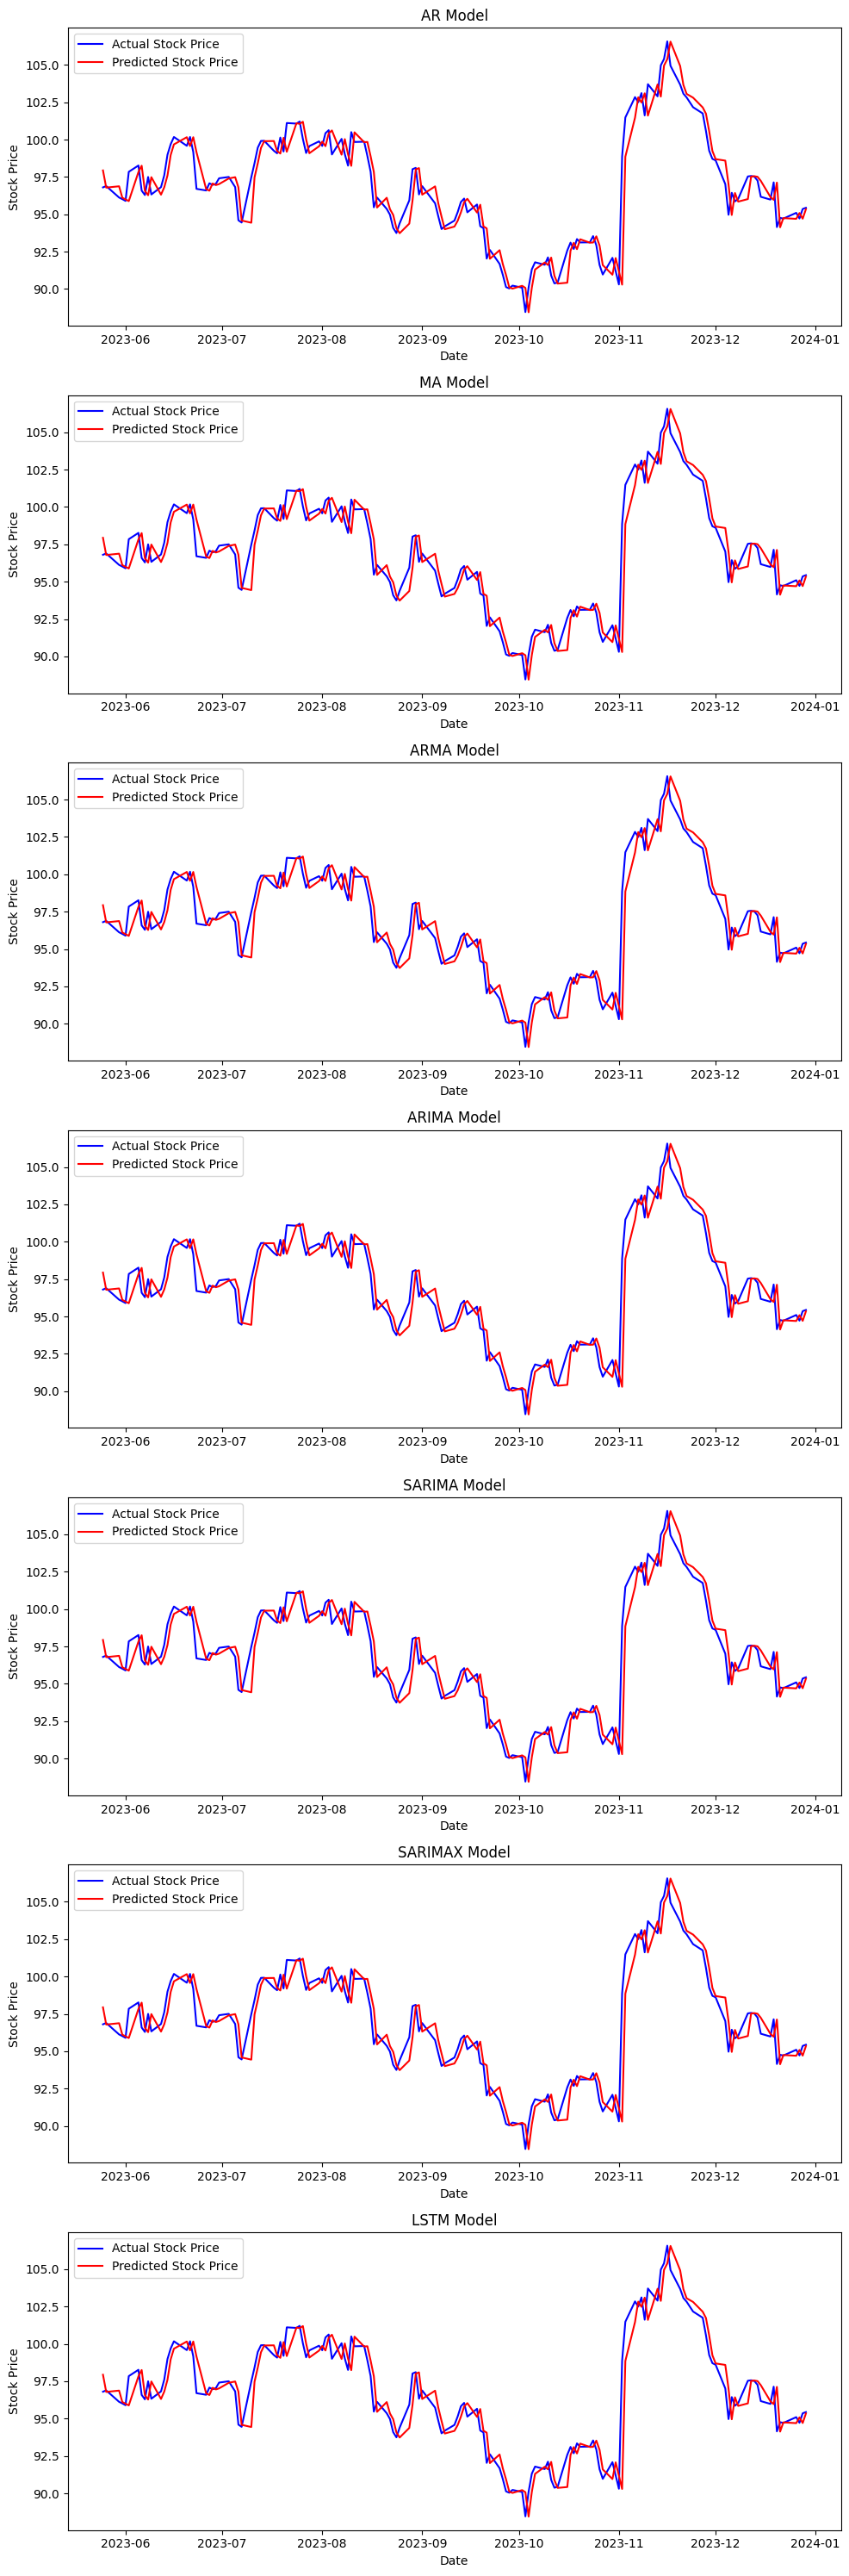

In [13]:

# Finally, we will create plots of all siven models showing 'actual stock price' and 'predicted stock price'.
import matplotlib.pyplot as plt

# Initialize subplots
fig, axs = plt.subplots(7, figsize=(10, 30))

# Plot actual and predicted stock prices for each model
for i, model_name in enumerate(model_names):
    ax = axs[i]
    ax.plot(test['Date'], test['Adj_Close'], label='Actual Stock Price', color='blue')
    ax.plot(test['Date'], predictions, label='Predicted Stock Price', color='red')
    ax.set_title(f'{model_name} Model')
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Price')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [ ]:

# END...
